In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph

In [2]:
def knn_segun_orden_entrada(pares, dimension, k):
    """
    Aplica KNN sobre coordenadas dadas en sistema cartesiano (origen abajo izquierda),
    pero preserva el orden original de los nodos como aparecen en la matriz `pares`.

    Parámetros:
    - pares: np.ndarray de shape (n, 2), con coordenadas (fila, columna) en sistema cartesiano.
    - dimension: entero, dimensión de la grilla cuadrada.
    - k: entero, número de vecinos.

    Retorna:
    - A: matriz de adyacencia KNN (sparse matrix de shape (n, n)), orden de nodos según `pares`.
    - pares_convertidos: np.ndarray de shape (n, 2), coordenadas convertidas al sistema de matrices.
    """
    pares_convertidos = pares.copy()
    pares_convertidos[:, 0] = dimension - 1 - pares_convertidos[:, 0]

    A = kneighbors_graph(pares_convertidos, n_neighbors=k, mode='connectivity', include_self=False)

    return A, pares_convertidos


In [3]:
def construir_diccionario_adyacencias():
    n = int(input("Ingrese la cantidad de nodos: "))
    matriz_adyacencia = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(i+1, n):
            conexion = input(f"¿Existe conexión entre el nodo {i+1} y el nodo {j+1}? (s/n): ").strip().lower()
            if conexion == 's':
                matriz_adyacencia[i, j] = 1
                matriz_adyacencia[j, i] = 1
    adyacencias = {}
    for i, fila in enumerate(matriz_adyacencia):
        adyacencias[i] = list(np.where(fila != 0)[0])
    return adyacencias

In [4]:
def construir_matriz_adyacencia(diccionario_adyacencias):
    n = len(diccionario_adyacencias)
    matriz = np.zeros((n, n), dtype=int)
    for nodo, vecinos in diccionario_adyacencias.items():
        for vecino in vecinos:
            matriz[nodo, vecino] = 1
    return matriz

In [4]:
def construir_matriz_laplaciana(matriz_adyacencia):
    # La matriz laplaciana L = D - A
    # D es la matriz diagonal de grados
    grados = np.sum(matriz_adyacencia, axis=1)
    matriz_grados = np.diag(grados)
    matriz_laplaciana = matriz_grados - matriz_adyacencia
    matriz_laplaciana = np.linalg.inv(matriz_grados)**0.5 @ matriz_laplaciana @ np.linalg.inv(matriz_grados)**0.5
    return matriz_laplaciana

In [6]:
mibici_4_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/mibici_4.npy')
n = mibici_4_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {mibici_4_nodes[0, i]}")

Node 1: [0 0]
Node 2: [0 1]
Node 3: [0 2]
Node 4: [0 3]
Node 5: [1 0]
Node 6: [1 1]
Node 7: [1 2]
Node 8: [1 3]
Node 9: [2 1]
Node 10: [2 2]
Node 11: [3 0]
Node 12: [3 1]


In [7]:
dir_mibici_4 = construir_diccionario_adyacencias()
adj_mibici_4 = construir_matriz_adyacencia(dir_mibici_4)
np.save('laplacians/adj_mibici_4.npy', adj_mibici_4)
laplacian_mibici_4 = construir_matriz_laplaciana(adj_mibici_4)
np.save('laplacians/laplacian_mibici_4.npy', laplacian_mibici_4)

In [51]:
mibici_6_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/mibici_6.npy')
n = mibici_6_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {mibici_6_nodes[0, i]}")

Node 1: [0 1]
Node 2: [0 4]
Node 3: [0 5]
Node 4: [1 0]
Node 5: [1 1]
Node 6: [1 2]
Node 7: [1 3]
Node 8: [1 4]
Node 9: [1 5]
Node 10: [2 0]
Node 11: [2 1]
Node 12: [2 2]
Node 13: [2 3]
Node 14: [2 4]
Node 15: [3 2]
Node 16: [3 3]
Node 17: [3 4]
Node 18: [4 1]
Node 19: [4 2]
Node 20: [4 3]
Node 21: [5 1]
Node 22: [5 2]


In [43]:
data_6 = mibici_6_nodes[0]
#data_6 = data_6[:, [1, 0]]

[]

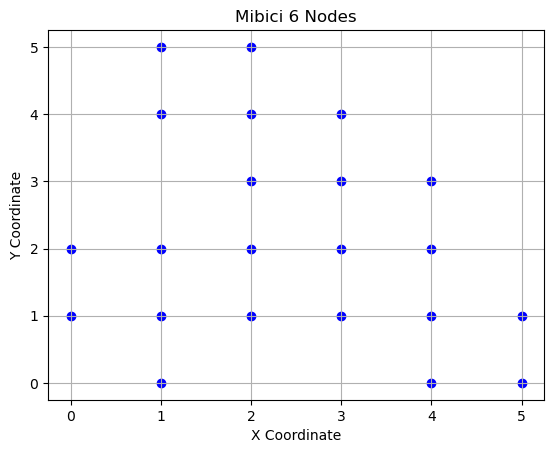

In [44]:
plt.scatter(data_6[:, 0], data_6[:, 1], c='blue', marker='o', label='Nodes')
plt.title('Mibici 6 Nodes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.plot()

In [57]:
adj_mibici_6, nodes = knn_segun_orden_entrada(data_6, 6, 3)
np.save('laplacians/adj_mibici_6.npy', adj_mibici_6.toarray())
laplacian_mibici_6 = construir_matriz_laplaciana(adj_mibici_6.toarray())
np.save('laplacians/laplacian_mibici_6.npy', laplacian_mibici_6)

In [58]:
mibici_8_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/mibici_8.npy')
n = mibici_8_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {mibici_8_nodes[0, i]}")

Node 1: [0 6]
Node 2: [0 7]
Node 3: [1 0]
Node 4: [1 1]
Node 5: [1 2]
Node 6: [1 4]
Node 7: [1 6]
Node 8: [1 7]
Node 9: [2 0]
Node 10: [2 1]
Node 11: [2 2]
Node 12: [2 3]
Node 13: [2 4]
Node 14: [2 5]
Node 15: [2 6]
Node 16: [3 1]
Node 17: [3 2]
Node 18: [3 3]
Node 19: [3 4]
Node 20: [3 5]
Node 21: [4 3]
Node 22: [4 4]
Node 23: [4 5]
Node 24: [5 3]
Node 25: [5 4]
Node 26: [5 5]
Node 27: [6 1]
Node 28: [6 2]
Node 29: [6 3]
Node 30: [7 1]
Node 31: [7 2]


[]

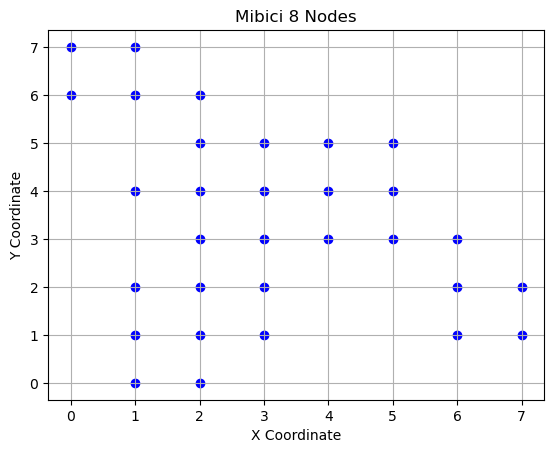

In [59]:
data_mibici_8 = mibici_8_nodes[0]
plt.scatter(data_mibici_8[:, 0], data_mibici_8[:, 1], c='blue', marker='o', label='Nodes')
plt.title('Mibici 8 Nodes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.plot()

In [60]:
adj_mibici_8, nodes = knn_segun_orden_entrada(data_mibici_8, 8, 3)
np.save('laplacians/adj_mibici_8.npy', adj_mibici_8.toarray())
laplacian_mibici_8 = construir_matriz_laplaciana(adj_mibici_8.toarray())
np.save('laplacians/laplacian_mibici_8.npy', laplacian_mibici_8)
adj_mibici_8.toarray().shape

(31, 31)

In [62]:
mibici_10_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/mibici_10.npy')
n = mibici_10_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {mibici_10_nodes[0, i]}")

Node 1: [0 8]
Node 2: [0 9]
Node 3: [1 1]
Node 4: [1 2]
Node 5: [1 7]
Node 6: [1 8]
Node 7: [1 9]
Node 8: [2 0]
Node 9: [2 1]
Node 10: [2 2]
Node 11: [2 3]
Node 12: [2 4]
Node 13: [2 5]
Node 14: [2 6]
Node 15: [2 7]
Node 16: [2 8]
Node 17: [3 0]
Node 18: [3 1]
Node 19: [3 2]
Node 20: [3 3]
Node 21: [3 4]
Node 22: [3 5]
Node 23: [3 6]
Node 24: [3 7]
Node 25: [3 8]
Node 26: [4 3]
Node 27: [4 4]
Node 28: [4 5]
Node 29: [4 6]
Node 30: [4 7]
Node 31: [5 4]
Node 32: [5 5]
Node 33: [5 6]
Node 34: [5 7]
Node 35: [6 4]
Node 36: [6 5]
Node 37: [6 6]
Node 38: [7 3]
Node 39: [7 4]
Node 40: [8 2]
Node 41: [8 3]
Node 42: [8 4]
Node 43: [9 1]
Node 44: [9 2]
Node 45: [9 3]


[]

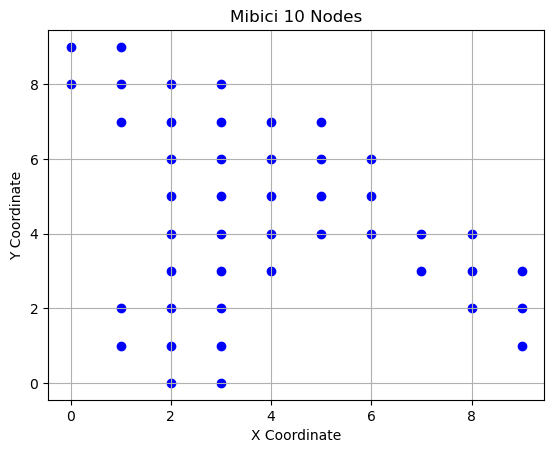

In [63]:
data_mibici_10 = mibici_10_nodes[0]
plt.scatter(data_mibici_10[:, 0], data_mibici_10[:, 1], c='blue', marker='o', label='Nodes')
plt.title('Mibici 10 Nodes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.plot()

In [64]:
adjacencia_mibici_10, nodes = knn_segun_orden_entrada(data_mibici_10, 10, 3)
np.save('laplacians/adj_mibici_10.npy', adjacencia_mibici_10.toarray())
laplacian_mibici_10 = construir_matriz_laplaciana(adjacencia_mibici_10.toarray())
np.save('laplacians/laplacian_mibici_10.npy', laplacian_mibici_10)
adjacencia_mibici_10.toarray().shape

(45, 45)

In [65]:
mibici_12_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/mibici_12.npy')
n = mibici_12_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {mibici_12_nodes[0, i]}")

Node 1: [ 0 10]
Node 2: [ 0 11]
Node 3: [1 2]
Node 4: [1 3]
Node 5: [1 9]
Node 6: [ 1 10]
Node 7: [ 1 11]
Node 8: [2 0]
Node 9: [2 1]
Node 10: [2 2]
Node 11: [2 3]
Node 12: [2 6]
Node 13: [2 7]
Node 14: [2 9]
Node 15: [ 2 10]
Node 16: [3 0]
Node 17: [3 1]
Node 18: [3 2]
Node 19: [3 3]
Node 20: [3 4]
Node 21: [3 5]
Node 22: [3 6]
Node 23: [3 7]
Node 24: [3 8]
Node 25: [3 9]
Node 26: [4 1]
Node 27: [4 2]
Node 28: [4 3]
Node 29: [4 4]
Node 30: [4 5]
Node 31: [4 6]
Node 32: [4 7]
Node 33: [4 8]
Node 34: [4 9]
Node 35: [5 4]
Node 36: [5 5]
Node 37: [5 6]
Node 38: [5 7]
Node 39: [5 8]
Node 40: [6 4]
Node 41: [6 5]
Node 42: [6 6]
Node 43: [6 7]
Node 44: [6 8]
Node 45: [7 5]
Node 46: [7 6]
Node 47: [7 7]
Node 48: [7 8]
Node 49: [8 4]
Node 50: [8 5]
Node 51: [8 7]
Node 52: [9 3]
Node 53: [9 4]
Node 54: [10  2]
Node 55: [10  3]
Node 56: [10  4]
Node 57: [10  5]
Node 58: [11  2]
Node 59: [11  3]
Node 60: [11  4]


[]

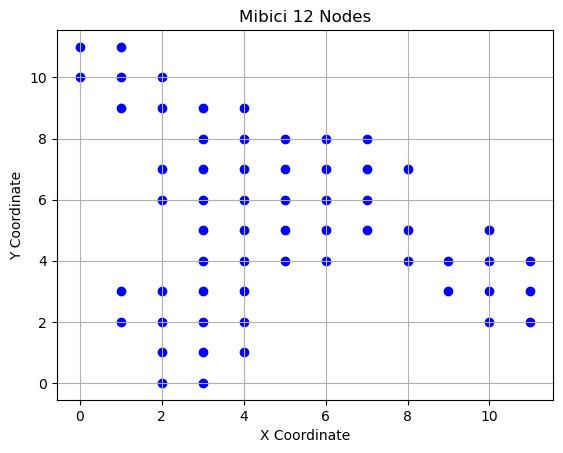

In [66]:
data_mibici_12 = mibici_12_nodes[0]
plt.scatter(data_mibici_12[:, 0], data_mibici_12[:, 1], c='blue', marker='o', label='Nodes')
plt.title('Mibici 12 Nodes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.plot()

In [67]:
adjacencia_mibici_12, nodes = knn_segun_orden_entrada(data_mibici_12, 12, 3)
np.save('laplacians/adj_mibici_12.npy', adjacencia_mibici_12.toarray())
laplacian_mibici_12 = construir_matriz_laplaciana(adjacencia_mibici_12.toarray())
np.save('laplacians/laplacian_mibici_12.npy', laplacian_mibici_12)
adjacencia_mibici_12.toarray().shape

(60, 60)

In [68]:
mibici_14_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/mibici_14.npy')
n = mibici_14_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {mibici_14_nodes[0, i]}")

Node 1: [ 0 12]
Node 2: [ 0 13]
Node 3: [ 1 11]
Node 4: [ 1 12]
Node 5: [ 1 13]
Node 6: [2 0]
Node 7: [2 2]
Node 8: [2 3]
Node 9: [2 4]
Node 10: [ 2 10]
Node 11: [ 2 11]
Node 12: [ 2 12]
Node 13: [3 0]
Node 14: [3 1]
Node 15: [3 2]
Node 16: [3 3]
Node 17: [3 4]
Node 18: [3 6]
Node 19: [3 7]
Node 20: [3 8]
Node 21: [ 3 10]
Node 22: [ 3 11]
Node 23: [4 0]
Node 24: [4 1]
Node 25: [4 2]
Node 26: [4 3]
Node 27: [4 4]
Node 28: [4 5]
Node 29: [4 6]
Node 30: [4 7]
Node 31: [4 8]
Node 32: [4 9]
Node 33: [ 4 10]
Node 34: [ 4 11]
Node 35: [5 1]
Node 36: [5 2]
Node 37: [5 3]
Node 38: [5 4]
Node 39: [5 5]
Node 40: [5 6]
Node 41: [5 7]
Node 42: [5 8]
Node 43: [5 9]
Node 44: [ 5 10]
Node 45: [6 4]
Node 46: [6 5]
Node 47: [6 6]
Node 48: [6 7]
Node 49: [6 8]
Node 50: [6 9]
Node 51: [ 6 10]
Node 52: [7 5]
Node 53: [7 6]
Node 54: [7 7]
Node 55: [7 8]
Node 56: [7 9]
Node 57: [ 7 10]
Node 58: [8 5]
Node 59: [8 6]
Node 60: [8 7]
Node 61: [8 8]
Node 62: [8 9]
Node 63: [ 8 10]
Node 64: [9 6]
Node 65: [9 7]
No

[]

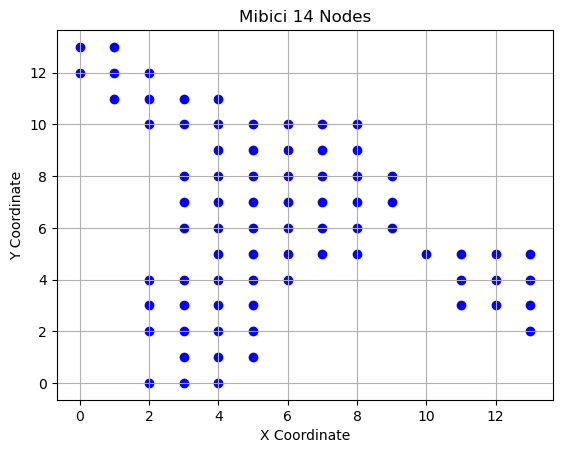

In [69]:
data_mibici_14 = mibici_14_nodes[0]
plt.scatter(data_mibici_14[:, 0], data_mibici_14[:, 1], c='blue', marker='o', label='Nodes')
plt.title('Mibici 14 Nodes')       
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.plot()

In [70]:
adjacencia_mibici_14, nodes = knn_segun_orden_entrada(data_mibici_14, 14, 3)
np.save('laplacians/adj_mibici_14.npy', adjacencia_mibici_14.toarray())
laplacian_mibici_14 = construir_matriz_laplaciana(adjacencia_mibici_14.toarray())
np.save('laplacians/laplacian_mibici_14.npy', laplacian_mibici_14)
adjacencia_mibici_14.toarray().shape

(77, 77)

In [71]:
mibici_16_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/mibici_16.npy')
n = mibici_16_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {mibici_16_nodes[0, i]}")

Node 1: [ 0 13]
Node 2: [ 0 14]
Node 3: [ 0 15]
Node 4: [ 1 13]
Node 5: [ 1 14]
Node 6: [ 1 15]
Node 7: [2 2]
Node 8: [2 3]
Node 9: [2 4]
Node 10: [ 2 12]
Node 11: [ 2 13]
Node 12: [ 2 14]
Node 13: [3 0]
Node 14: [3 1]
Node 15: [3 2]
Node 16: [3 3]
Node 17: [3 4]
Node 18: [3 8]
Node 19: [3 9]
Node 20: [ 3 12]
Node 21: [ 3 13]
Node 22: [4 0]
Node 23: [4 1]
Node 24: [4 2]
Node 25: [4 3]
Node 26: [4 4]
Node 27: [4 5]
Node 28: [4 6]
Node 29: [4 7]
Node 30: [4 8]
Node 31: [4 9]
Node 32: [ 4 11]
Node 33: [ 4 12]
Node 34: [ 4 13]
Node 35: [5 2]
Node 36: [5 3]
Node 37: [5 4]
Node 38: [5 5]
Node 39: [5 6]
Node 40: [5 7]
Node 41: [5 8]
Node 42: [5 9]
Node 43: [ 5 10]
Node 44: [ 5 11]
Node 45: [ 5 12]
Node 46: [6 2]
Node 47: [6 5]
Node 48: [6 6]
Node 49: [6 7]
Node 50: [6 8]
Node 51: [6 9]
Node 52: [ 6 10]
Node 53: [ 6 11]
Node 54: [7 5]
Node 55: [7 6]
Node 56: [7 7]
Node 57: [7 8]
Node 58: [7 9]
Node 59: [ 7 10]
Node 60: [ 7 11]
Node 61: [8 6]
Node 62: [8 7]
Node 63: [8 8]
Node 64: [8 9]
Node 65

[]

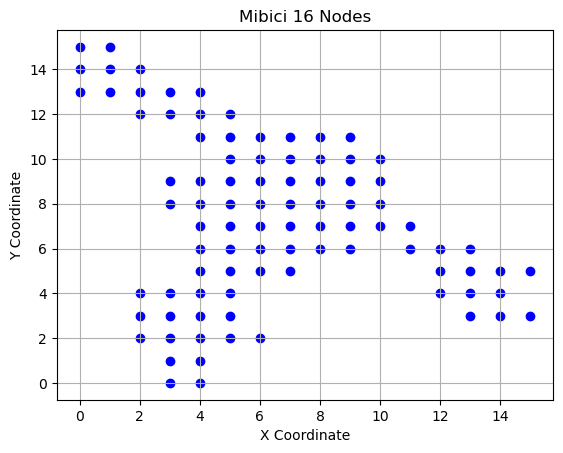

In [72]:
data_mibici_16 = mibici_16_nodes[0]
plt.scatter(data_mibici_16[:, 0], data_mibici_16[:, 1], c='blue', marker='o', label='Nodes')
plt.title('Mibici 16 Nodes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.plot()

In [73]:
adjacencia_mibici_16, nodes = knn_segun_orden_entrada(data_mibici_16, 16, 3)
np.save('laplacians/adj_mibici_16.npy', adjacencia_mibici_16.toarray())
laplacian_mibici_16 = construir_matriz_laplaciana(adjacencia_mibici_16.toarray())
np.save('laplacians/laplacian_mibici_16.npy', laplacian_mibici_16)
adjacencia_mibici_16.toarray().shape

(90, 90)

eco

In [74]:
eco_4_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/eco_4.npy')
n = eco_4_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {eco_4_nodes[0, i]}")

Node 1: [0 1]
Node 2: [0 2]
Node 3: [0 3]
Node 4: [1 1]
Node 5: [1 2]
Node 6: [1 3]
Node 7: [2 1]
Node 8: [2 2]
Node 9: [2 3]
Node 10: [3 1]
Node 11: [3 2]
Node 12: [3 3]
Node 13: [4 0]
Node 14: [4 1]
Node 15: [4 2]
Node 16: [4 3]
Node 17: [5 0]
Node 18: [5 1]
Node 19: [5 2]
Node 20: [5 3]
Node 21: [6 1]
Node 22: [6 2]


[]

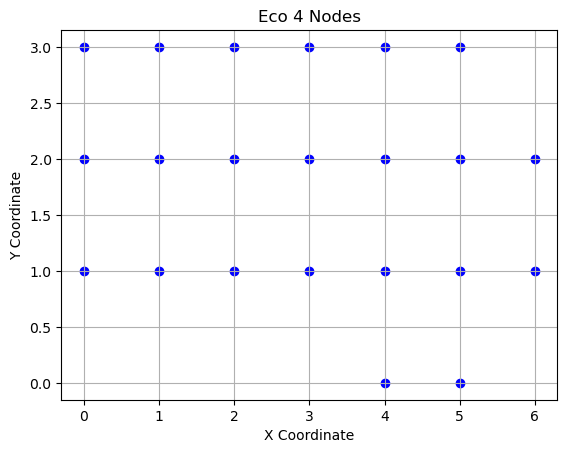

In [75]:
data_eco_4 = eco_4_nodes[0]
plt.scatter(data_eco_4[:, 0], data_eco_4[:, 1], c='blue', marker='o', label='Nodes')
plt.title('Eco 4 Nodes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')     
plt.grid()
plt.plot()

In [76]:
adjacencia_eco, nodes = knn_segun_orden_entrada(data_eco_4, 4, 3)
np.save('laplacians/adj_eco_4.npy', adjacencia_eco.toarray())
laplacian_eco_4 = construir_matriz_laplaciana(adjacencia_eco.toarray())
np.save('laplacians/laplacian_eco_4.npy', laplacian_eco_4)
adjacencia_eco.toarray().shape

(22, 22)

In [77]:
eco_6_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/eco_6.npy')
n = eco_6_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {eco_6_nodes[0, i]}")

Node 1: [0 1]
Node 2: [0 2]
Node 3: [0 3]
Node 4: [0 4]
Node 5: [1 1]
Node 6: [1 2]
Node 7: [1 3]
Node 8: [1 4]
Node 9: [1 5]
Node 10: [2 1]
Node 11: [2 2]
Node 12: [2 3]
Node 13: [2 4]
Node 14: [2 5]
Node 15: [3 1]
Node 16: [3 2]
Node 17: [3 3]
Node 18: [3 4]
Node 19: [3 5]
Node 20: [4 2]
Node 21: [4 3]
Node 22: [4 4]
Node 23: [4 5]
Node 24: [5 1]
Node 25: [5 2]
Node 26: [5 3]
Node 27: [5 4]
Node 28: [5 5]
Node 29: [6 0]
Node 30: [6 1]
Node 31: [6 2]
Node 32: [6 3]
Node 33: [6 4]
Node 34: [6 5]
Node 35: [7 0]
Node 36: [7 1]
Node 37: [7 2]
Node 38: [7 3]
Node 39: [7 4]
Node 40: [7 5]
Node 41: [8 2]
Node 42: [8 3]
Node 43: [8 4]
Node 44: [9 1]
Node 45: [9 2]
Node 46: [9 3]


In [78]:
adjacencia_eco_6, nodes = knn_segun_orden_entrada(eco_6_nodes[0], 6, 3)
np.save('laplacians/adj_eco_6.npy', adjacencia_eco_6.toarray())
laplacian_eco_6 = construir_matriz_laplaciana(adjacencia_eco_6.toarray())
np.save('laplacians/laplacian_eco_6.npy', laplacian_eco_6)
adjacencia_eco_6.toarray().shape

(46, 46)

In [79]:
eco_8_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/eco_8.npy')
n = eco_8_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {eco_8_nodes[0, i]}")

Node 1: [0 2]
Node 2: [0 3]
Node 3: [0 4]
Node 4: [0 5]
Node 5: [0 6]
Node 6: [1 2]
Node 7: [1 3]
Node 8: [1 4]
Node 9: [1 5]
Node 10: [1 6]
Node 11: [2 2]
Node 12: [2 3]
Node 13: [2 4]
Node 14: [2 5]
Node 15: [2 6]
Node 16: [3 2]
Node 17: [3 3]
Node 18: [3 4]
Node 19: [3 5]
Node 20: [3 6]
Node 21: [4 2]
Node 22: [4 3]
Node 23: [4 4]
Node 24: [4 5]
Node 25: [4 6]
Node 26: [4 7]
Node 27: [5 2]
Node 28: [5 3]
Node 29: [5 4]
Node 30: [5 5]
Node 31: [5 6]
Node 32: [5 7]
Node 33: [6 2]
Node 34: [6 3]
Node 35: [6 4]
Node 36: [6 5]
Node 37: [6 6]
Node 38: [6 7]
Node 39: [7 2]
Node 40: [7 3]
Node 41: [7 4]
Node 42: [7 5]
Node 43: [7 6]
Node 44: [7 7]
Node 45: [8 0]
Node 46: [8 2]
Node 47: [8 3]
Node 48: [8 4]
Node 49: [8 5]
Node 50: [8 6]
Node 51: [8 7]
Node 52: [9 0]
Node 53: [9 1]
Node 54: [9 2]
Node 55: [9 3]
Node 56: [9 4]
Node 57: [9 5]
Node 58: [9 6]
Node 59: [9 7]
Node 60: [10  0]
Node 61: [10  1]
Node 62: [10  2]
Node 63: [10  3]
Node 64: [10  4]
Node 65: [10  5]
Node 66: [10  6]
Node 

In [80]:
adjacencia_eco_8, nodes = knn_segun_orden_entrada(eco_8_nodes[0], 8, 3)
np.save('laplacians/adj_eco_8.npy', adjacencia_eco_8.toarray())
laplacian_eco_8 = construir_matriz_laplaciana(adjacencia_eco_8.toarray())
np.save('laplacians/laplacian_eco_8.npy', laplacian_eco_8)
adjacencia_eco_8.toarray().shape

(80, 80)

In [81]:
eco_10_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/eco_10.npy')
n = eco_10_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {eco_10_nodes[0, i]}")

Node 1: [0 3]
Node 2: [0 4]
Node 3: [0 5]
Node 4: [0 6]
Node 5: [0 7]
Node 6: [0 8]
Node 7: [1 2]
Node 8: [1 3]
Node 9: [1 4]
Node 10: [1 5]
Node 11: [1 6]
Node 12: [1 7]
Node 13: [2 2]
Node 14: [2 3]
Node 15: [2 4]
Node 16: [2 5]
Node 17: [2 6]
Node 18: [2 7]
Node 19: [2 8]
Node 20: [3 3]
Node 21: [3 4]
Node 22: [3 5]
Node 23: [3 6]
Node 24: [3 7]
Node 25: [3 8]
Node 26: [4 3]
Node 27: [4 4]
Node 28: [4 5]
Node 29: [4 6]
Node 30: [4 7]
Node 31: [4 8]
Node 32: [5 3]
Node 33: [5 4]
Node 34: [5 5]
Node 35: [5 6]
Node 36: [5 7]
Node 37: [5 8]
Node 38: [6 3]
Node 39: [6 4]
Node 40: [6 5]
Node 41: [6 6]
Node 42: [6 7]
Node 43: [6 8]
Node 44: [7 3]
Node 45: [7 4]
Node 46: [7 5]
Node 47: [7 6]
Node 48: [7 7]
Node 49: [7 8]
Node 50: [7 9]
Node 51: [8 3]
Node 52: [8 4]
Node 53: [8 5]
Node 54: [8 6]
Node 55: [8 7]
Node 56: [8 8]
Node 57: [8 9]
Node 58: [9 2]
Node 59: [9 3]
Node 60: [9 4]
Node 61: [9 5]
Node 62: [9 6]
Node 63: [9 7]
Node 64: [9 8]
Node 65: [9 9]
Node 66: [10  2]
Node 67: [10  3]


In [82]:
adjacencia_eco_10, nodes = knn_segun_orden_entrada(eco_10_nodes[0], 10, 3)
np.save('laplacians/adj_eco_10.npy', adjacencia_eco_10.toarray())
laplacian_eco_10 = construir_matriz_laplaciana(adjacencia_eco_10.toarray())
np.save('laplacians/laplacian_eco_10.npy', laplacian_eco_10)
adjacencia_eco_10.toarray().shape

(123, 123)

In [83]:
eco_12_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/eco_12.npy')
n = eco_12_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {eco_12_nodes[0, i]}")

Node 1: [0 3]
Node 2: [0 5]
Node 3: [0 6]
Node 4: [0 7]
Node 5: [0 8]
Node 6: [0 9]
Node 7: [1 3]
Node 8: [1 4]
Node 9: [1 5]
Node 10: [1 6]
Node 11: [1 7]
Node 12: [1 8]
Node 13: [1 9]
Node 14: [2 3]
Node 15: [2 4]
Node 16: [2 5]
Node 17: [2 6]
Node 18: [2 7]
Node 19: [2 8]
Node 20: [2 9]
Node 21: [3 3]
Node 22: [3 4]
Node 23: [3 5]
Node 24: [3 6]
Node 25: [3 7]
Node 26: [3 8]
Node 27: [3 9]
Node 28: [ 3 10]
Node 29: [4 3]
Node 30: [4 4]
Node 31: [4 5]
Node 32: [4 6]
Node 33: [4 7]
Node 34: [4 8]
Node 35: [4 9]
Node 36: [ 4 10]
Node 37: [5 4]
Node 38: [5 5]
Node 39: [5 6]
Node 40: [5 7]
Node 41: [5 8]
Node 42: [5 9]
Node 43: [ 5 10]
Node 44: [6 3]
Node 45: [6 4]
Node 46: [6 5]
Node 47: [6 6]
Node 48: [6 7]
Node 49: [6 8]
Node 50: [6 9]
Node 51: [ 6 10]
Node 52: [7 4]
Node 53: [7 5]
Node 54: [7 6]
Node 55: [7 7]
Node 56: [7 8]
Node 57: [7 9]
Node 58: [ 7 10]
Node 59: [8 4]
Node 60: [8 5]
Node 61: [8 6]
Node 62: [8 7]
Node 63: [8 8]
Node 64: [8 9]
Node 65: [ 8 10]
Node 66: [9 4]
Node 67

In [84]:
adjacencia_eco_12, nodes = knn_segun_orden_entrada(eco_12_nodes[0], 12, 3)
np.save('laplacians/adj_eco_12.npy', adjacencia_eco_12.toarray())
laplacian_eco_12 = construir_matriz_laplaciana(adjacencia_eco_12.toarray())
np.save('laplacians/laplacian_eco_12.npy', laplacian_eco_12)
adjacencia_eco_12.toarray().shape

(161, 161)

In [5]:
eco_14_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/eco_14.npy')
n = eco_14_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {eco_14_nodes[0, i]}")

Node 1: [0 4]
Node 2: [0 5]
Node 3: [0 6]
Node 4: [0 7]
Node 5: [0 8]
Node 6: [0 9]
Node 7: [ 0 10]
Node 8: [ 0 11]
Node 9: [1 4]
Node 10: [1 5]
Node 11: [1 6]
Node 12: [1 7]
Node 13: [1 8]
Node 14: [1 9]
Node 15: [ 1 10]
Node 16: [ 1 11]
Node 17: [2 4]
Node 18: [2 5]
Node 19: [2 6]
Node 20: [2 7]
Node 21: [2 8]
Node 22: [2 9]
Node 23: [ 2 10]
Node 24: [ 2 11]
Node 25: [3 4]
Node 26: [3 5]
Node 27: [3 6]
Node 28: [3 7]
Node 29: [3 8]
Node 30: [3 9]
Node 31: [ 3 10]
Node 32: [ 3 11]
Node 33: [4 4]
Node 34: [4 5]
Node 35: [4 6]
Node 36: [4 7]
Node 37: [4 8]
Node 38: [4 9]
Node 39: [ 4 10]
Node 40: [ 4 11]
Node 41: [5 4]
Node 42: [5 5]
Node 43: [5 6]
Node 44: [5 7]
Node 45: [5 8]
Node 46: [5 9]
Node 47: [ 5 10]
Node 48: [ 5 11]
Node 49: [6 4]
Node 50: [6 5]
Node 51: [6 6]
Node 52: [6 7]
Node 53: [6 8]
Node 54: [6 9]
Node 55: [ 6 10]
Node 56: [ 6 11]
Node 57: [7 4]
Node 58: [7 5]
Node 59: [7 6]
Node 60: [7 7]
Node 61: [7 8]
Node 62: [7 9]
Node 63: [ 7 10]
Node 64: [ 7 11]
Node 65: [ 7 12]


In [6]:
adjacencia_eco_14, nodes = knn_segun_orden_entrada(eco_14_nodes[0], 14, 3)
np.save('laplacians/adj_eco_14.npy', adjacencia_eco_14.toarray())
laplacian_eco_14 = construir_matriz_laplaciana(adjacencia_eco_14.toarray())
np.save('laplacians/laplacian_eco_14.npy', laplacian_eco_14)
adjacencia_eco_14.toarray().shape

(219, 219)

In [7]:
eco_16_nodes = np.load('/Users/antoniomendez/Desktop/maps_grids/eco_16.npy')
n = eco_16_nodes.shape[1]
for i in range(n):
    print(f"Node {i+1}: {eco_16_nodes[0, i]}")

Node 1: [0 6]
Node 2: [0 7]
Node 3: [0 8]
Node 4: [0 9]
Node 5: [ 0 10]
Node 6: [ 0 11]
Node 7: [ 0 12]
Node 8: [1 5]
Node 9: [1 6]
Node 10: [1 7]
Node 11: [1 8]
Node 12: [1 9]
Node 13: [ 1 10]
Node 14: [ 1 11]
Node 15: [ 1 12]
Node 16: [2 4]
Node 17: [2 5]
Node 18: [2 6]
Node 19: [2 7]
Node 20: [2 8]
Node 21: [2 9]
Node 22: [ 2 10]
Node 23: [ 2 11]
Node 24: [ 2 12]
Node 25: [3 4]
Node 26: [3 5]
Node 27: [3 6]
Node 28: [3 8]
Node 29: [3 9]
Node 30: [ 3 10]
Node 31: [ 3 11]
Node 32: [ 3 12]
Node 33: [ 3 13]
Node 34: [4 4]
Node 35: [4 5]
Node 36: [4 6]
Node 37: [4 7]
Node 38: [4 8]
Node 39: [4 9]
Node 40: [ 4 10]
Node 41: [ 4 11]
Node 42: [ 4 12]
Node 43: [ 4 13]
Node 44: [5 4]
Node 45: [5 5]
Node 46: [5 6]
Node 47: [5 7]
Node 48: [5 8]
Node 49: [5 9]
Node 50: [ 5 10]
Node 51: [ 5 11]
Node 52: [ 5 12]
Node 53: [ 5 13]
Node 54: [6 5]
Node 55: [6 6]
Node 56: [6 7]
Node 57: [6 8]
Node 58: [6 9]
Node 59: [ 6 10]
Node 60: [ 6 11]
Node 61: [ 6 12]
Node 62: [7 5]
Node 63: [7 6]
Node 64: [7 7]
N

In [8]:
adjacencia_eco_16, nodes = knn_segun_orden_entrada(eco_16_nodes[0], 16, 3)
np.save('laplacians/adj_eco_16.npy', adjacencia_eco_16.toarray())
laplacian_eco_16 = construir_matriz_laplaciana(adjacencia_eco_16.toarray())
np.save('laplacians/laplacian_eco_16.npy', laplacian_eco_16)
adjacencia_eco_16.toarray().shape

(264, 264)

In [2]:
eco_3 = np.load('/Users/antoniomendez/Desktop/maps_grids/eco_3.npy')
n = eco_3.shape[1]
for i in range(n):
    print(f"Node {i+1}: {eco_3[0, i]}")

Node 1: [0 0]
Node 2: [0 1]
Node 3: [0 2]
Node 4: [1 0]
Node 5: [1 1]
Node 6: [1 2]
Node 7: [2 0]
Node 8: [2 1]
Node 9: [2 2]
Node 10: [3 0]
Node 11: [3 1]
Node 12: [3 2]
Node 13: [4 0]
Node 14: [4 1]
Node 15: [4 2]
